# Uber Supply-Demand Gap Analysis

This project analyzes the Uber ride request dataset to identify gaps in supply and demand across different time slots during the day using Python (Pandas, Matplotlib, Seaborn).


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load dataset
df = pd.read_csv("/content/Uber_Request_Cleaned.csv")  # Rename file as needed
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Time Slot
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,11,Morning
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,17,Evening
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,9,Morning
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,21,Night
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning


**Data Wrangling** ::

In [7]:
# 1. Handle missing values
# Replace missing Driver IDs and Drop timestamps with NaN (already present)
print("Missing values before cleanup:")
print(df.isnull().sum())

Missing values before cleanup:
Request id              0
Pickup point            0
Driver id            2650
Status                  0
Request timestamp       0
Drop timestamp       3914
Request hour            0
Time Slot               0
dtype: int64


In [12]:
df['Driver id'].fillna(-1, inplace=True)
df['Drop timestamp'].fillna(-1, inplace=True)

/tmp/ipython-input-3211748697.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Driver id'].fillna(-1, inplace=True)
/tmp/ipython-input-3211748697.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.

In [13]:
print(df.isnull().sum())

Request id           0
Pickup point         0
Driver id            0
Status               0
Request timestamp    0
Drop timestamp       0
Request hour         0
Time Slot            0
dtype: int64


In [16]:
df = df.dropna(subset=['Driver id'])


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          6745 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     6745 non-null   object        
 6   Request hour       6745 non-null   int64         
 7   Time Slot          6745 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 421.7+ KB


In [15]:
df.describe()

,Request id,Driver id,Request timestamp,Request hour
count,6745.000000,6745.000000,6745,6745.000000
mean,3384.644922,90.371831,2016-09-04 08:17:42.642549760,12.956709
min,1.000000,-1.000000,2016-07-12 20:16:00,0.000000
25%,1691.000000,-1.000000,2016-07-14 07:37:30,7.000000
50%,3387.000000,53.000000,2016-07-15 13:44:09,13.000000
75%,5080.000000,177.000000,2016-11-07 19:00:00,19.000000
max,6766.000000,300.000000,2016-12-07 23:54:00,23.000000
std,1955.099667,99.492740,NaN,6.504052


**Convert Columns to Correct Data Types
Make sure date and time fields are in proper format :**

In [17]:
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], dayfirst=True, errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst=True, errors='coerce')


In [23]:
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Time Slot,Request date
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning,2016-11-07
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,2016-11-07
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning,2016-12-07
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,2016-12-07
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,2016-07-13


In [26]:
df.dtypes

,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request timestamp,datetime64[ns]
Drop timestamp,datetime64[ns]
Request hour,int32
Time Slot,object
Request date,object


**Create new useful columns from existing ones :**

In [18]:
# Extract hour and date
df['Request hour'] = df['Request timestamp'].dt.hour
df['Request date'] = df['Request timestamp'].dt.date

In [24]:
df.head()


,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Time Slot,Request date
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning,2016-11-07
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,2016-11-07
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning,2016-12-07
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,2016-12-07
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,2016-07-13


In [25]:
df.dtypes

,0
Request id,int64
Pickup point,object
Driver id,float64
Status,object
Request timestamp,datetime64[ns]
Drop timestamp,datetime64[ns]
Request hour,int32
Time Slot,object
Request date,object


In [19]:
# Create a Time Slot column
def get_timeslot(hour):
    if 0 <= hour < 5: return 'Late Night'
    elif 5 <= hour < 9: return 'Early Morning'
    elif 9 <= hour < 12: return 'Morning'
    elif 12 <= hour < 17: return 'Afternoon'
    elif 17 <= hour < 21: return 'Evening'
    else: return 'Night'

df['Time Slot'] = df['Request hour'].apply(get_timeslot)


In [27]:
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request hour,Time Slot,Request date
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,Morning,2016-11-07
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,Evening,2016-11-07
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,Morning,2016-12-07
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,Night,2016-12-07
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,Early Morning,2016-07-13


In [20]:
# Status distribution
df['Status'].value_counts()

,count
Status,
Trip Completed,2831
No Cars Available,2650
Cancelled,1264


In [21]:
# Requests by pickup point
df['Pickup point'].value_counts()


,count
Pickup point,
City,3507
Airport,3238


In [22]:
# Requests by time slot and status
df.groupby(['Time Slot', 'Status']).size()

Time Slot      Status           
Afternoon      Cancelled              91
               No Cars Available     228
               Trip Completed        491
Early Morning  Cancelled             668
               No Cars Available     323
               Trip Completed        681
Evening        Cancelled             124
               No Cars Available    1127
               Trip Completed        642
Late Night     Cancelled              65
               No Cars Available     299
               Trip Completed        214
Morning        Cancelled             252
               No Cars Available     189
               Trip Completed        404
Night          Cancelled              64
               No Cars Available     484
               Trip Completed        399
dtype: int64

**Data Visualizations**

 **1. Status Distribution (Overall)**

  **Description:**
This bar chart shows the total number of ride requests categorized by status:

*Trip Completed*

*Cancelled*

*No Cars Available*



 **Key Insights:**

A significant portion of requests were not completed (either cancelled or due to unavailability).

Trip cancellations are nearly as high as completed trips.

Shows there’s a clear supply-demand mismatch in the system.

/tmp/ipython-input-1437881112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Status', data=df, palette='Set2')


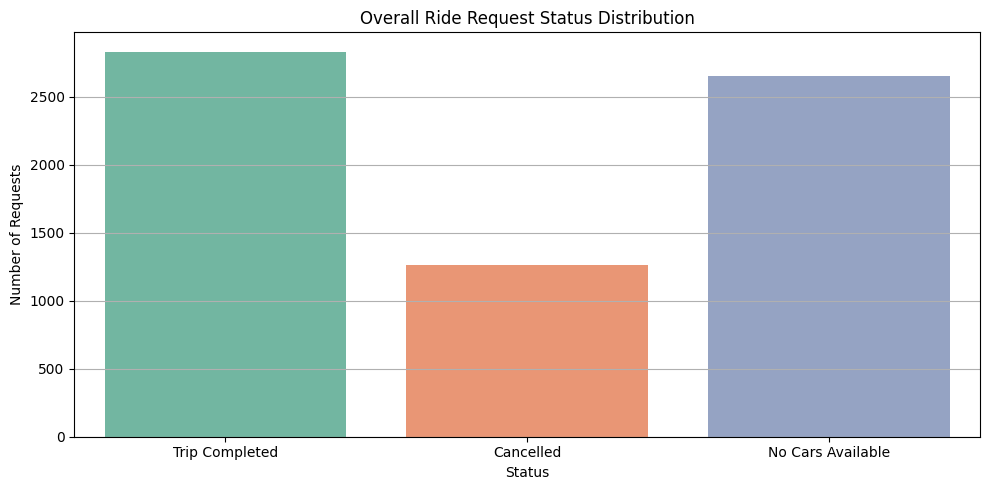

In [30]:
plt.figure(figsize=(10,5))
sns.countplot(x='Status', data=df, palette='Set2')
plt.title('Overall Ride Request Status Distribution')
plt.xlabel('Status')
plt.ylabel('Number of Requests')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**2. Request Status by Time Slot**

**Description:**
Stacked bar chart comparing ride request statuses across different time slots (Morning, Night, etc.).

**Key Insights:**

*Early Morning and Morning:*   High cancellations by drivers.

*Late Night and Night:*   Many requests result in No Cars Available.

*Afternoon and Evening:*   Majority of trips are successfully completed.

**Conclusion:** These time slots represent critical supply-demand gap periods.

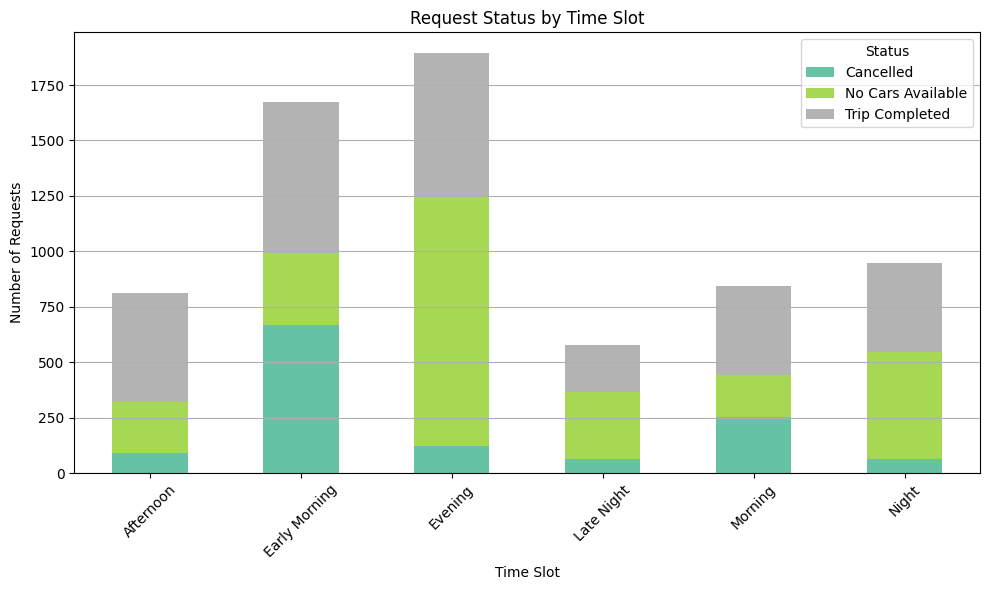

In [31]:
slot_status = df.groupby(['Time Slot', 'Status']).size().unstack().fillna(0)

slot_status.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title('Request Status by Time Slot')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

**3. Requests by Hour of the Day**

**Description:**
A histogram showing how many requests occurred at each hour from 0 to 23.

**Key Insights:**

Peak request hours are from 5 AM to 10 AM and 5 PM to 9 PM.

Sharp spikes in early morning and evening indicate rush hour demand.

Understanding these peaks helps Uber plan driver availability better.

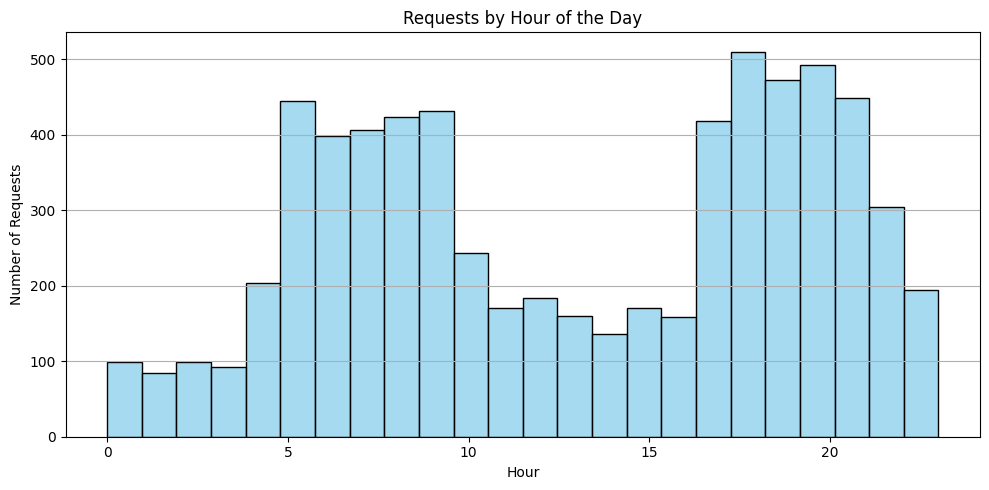

In [32]:
plt.figure(figsize=(10,5))
sns.histplot(df['Request hour'], bins=24, kde=False, color='skyblue')
plt.title('Requests by Hour of the Day')
plt.xlabel('Hour')
plt.ylabel('Number of Requests')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**4. Pickup Point vs Status**

**Description:**
Bar plot that compares status types based on where the trip was requested: Airport or City.

**Key Insights:**

City pickups have high cancellation rates.

Airport pickups often result in No Cars Available, especially during Night/Late Night.

Indicates driver reluctance to pick up from airport at night or city during rush hours.


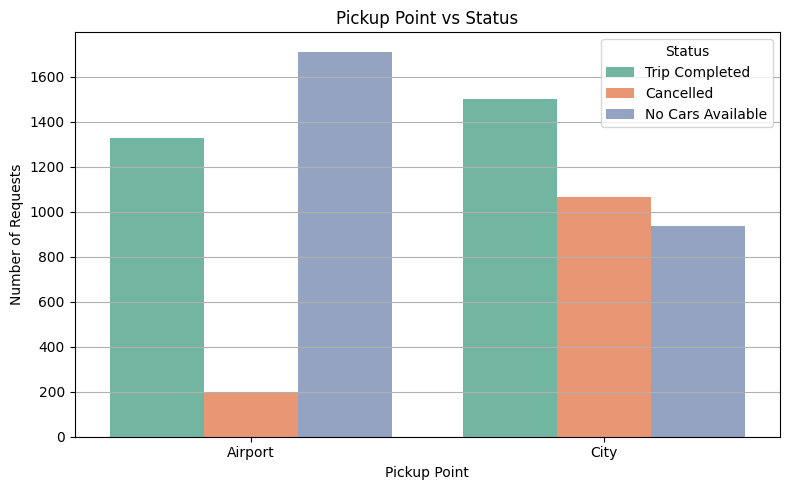

In [33]:
plt.figure(figsize=(8,5))
sns.countplot(x='Pickup point', hue='Status', data=df, palette='Set2')
plt.title('Pickup Point vs Status')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


**Summary** :

These four visualizations clearly highlight **when** and **where** the demand exceeds the supply, helping Uber:

> Target driver availability

> Offer time-based incentives

> Reduce customer drop-offs












**✅ Conclusion of the Uber Supply-Demand Gap Project**

This project analyzed Uber ride request data to uncover patterns of ride completion, cancellations, and unavailability, focusing on different time slots and pickup points.

**🔍 Key Findings:**

High Demand Periods:
Peak requests occur during Early Morning (5 AM–9 AM) and Evening (5 PM–9 PM) hours.

**Critical Supply-Demand Gaps:**

Early Morning & Morning: High ride cancellations by drivers.

Night & Late Night: Many requests return ‘No Cars Available’—indicating driver shortage.

**Pickup Point Behavior:**

City → Airport trips are often cancelled during peak hours.

Airport → City trips face driver unavailability, especially during night hours.

**🚀 Business Recommendations:**

Introduce incentives for drivers during rush hours and late-night shifts.

Implement night shift scheduling at airports to reduce unmet demand.

Use predictive analytics to allocate drivers dynamically based on hourly and location-based demand.

**🎯 Final Conclusion:**

There exists a significant supply-demand imbalance in Uber operations during specific times of the day and locations.
By leveraging time-slot based planning and targeted incentives, Uber can significantly improve customer experience, reduce lost requests, and optimize driver utilization.